# Tomografia komputerowa

In [36]:
import cv2
import numpy as np
from ct.radon import radon
from ct.inverse_radon import iradon
from ct.common import *
from ct.ct import CT
from ct.interactive_ct import InteractiveCT
from ct.common import preprocess
from ipywidgets import IntText, interact, Checkbox, Text, VBox
import matplotlib.pyplot as plt

In [25]:
style = {'description_width': 'initial'}
steps = IntText(
    value=1,
    min=1,
    max=180,
    step=1,
    description='Krok: ',
    disabled=False,
    style=style
)
number_of_detectors = IntText(
    value=10,
    min=1,
    step=1,
    description='Liczba detektorów: ',
    disabled=False,
    style=style
)
detector_distance = IntText(
    value=10,
    min=1,
    step=1,
    description='Rozpiętość między detektorami (px): ',
    disabled=False,
    style=style
)
interactive = Checkbox(
    value=False,
    description='Wersja interaktywna',
    disabled=False,
    indent=False
)
filename = Text(
    description='Ścieżka do pliku',
    style=style
)

## Menu

In [26]:
VBox([filename, steps, number_of_detectors, detector_distance, interactive])

In [37]:
# image = preprocess.load_image(filename.value)
image = preprocess.load_example(1)

if interactive.value is True:
    ct = InteractiveCT(image, steps.value, 1, number_of_detectors.value, detector_distance.value)
else:
    ct = CT(image, steps.value, 1, number_of_detectors.value, detector_distance.value)

sinogram, reconstructed_image = ct.run()

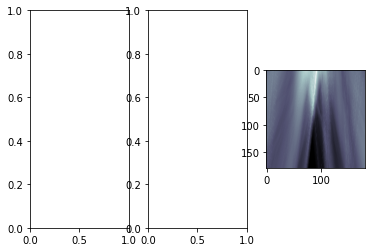

In [58]:
fig, ax = plt.subplots(1, 3)

ax[0] = plt.imshow(reconstructed_image, cmap='bone')
ax[1] = plt.imshow(sinogram, cmap='bone')
